In [32]:
from keras.datasets import imdb
import numpy as np 

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
  # Create an all-zero matrix of shape (len(sequences), dimension)
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.  # set specific indices of results[i] to 1s
  return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17473536/17464789 [==============================] - 0s 0us/step


In [33]:
#Let's try this on our movie review classification network. Our original network was as such:

from keras import layers 
from keras import models 

original_model = models.Sequential()
original_model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(64, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

In [34]:
#Now let's try to replace it with this smaller network:

smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [35]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 6s 113ms/step - loss: 0.4151 - accuracy: 0.8232 - val_loss: 0.3109 - val_accuracy: 0.8766
Epoch 2/20
49/49 [==============================] - 4s 86ms/step - loss: 0.2394 - accuracy: 0.9098 - val_loss: 0.3016 - val_accuracy: 0.8767
Epoch 3/20
49/49 [==============================] - 3s 69ms/step - loss: 0.1842 - accuracy: 0.9302 - val_loss: 0.2990 - val_accuracy: 0.8826
Epoch 4/20
49/49 [==============================] - 3s 66ms/step - loss: 0.1468 - accuracy: 0.9451 - val_loss: 0.3420 - val_accuracy: 0.8716
Epoch 5/20
49/49 [==============================] - 3s 66ms/step - loss: 0.1227 - accuracy: 0.9558 - val_loss: 0.3436 - val_accuracy: 0.8758
Epoch 6/20
49/49 [==============================] - 3s 71ms/step - loss: 0.0856 - accuracy: 0.9695 - val_loss: 0.4711 - val_accuracy: 0.8557
Epoch 7/20
49/49 [==============================] - 3s 69ms/step - loss: 0.0698 - accuracy: 0.9762 - val_loss: 0.4289 - val_accuracy: 0.8701
Epoch 8/20
4

In [36]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 64ms/step - loss: 0.5689 - accuracy: 0.7624 - val_loss: 0.4844 - val_accuracy: 0.8402
Epoch 2/20
49/49 [==============================] - 3s 52ms/step - loss: 0.4013 - accuracy: 0.8887 - val_loss: 0.3775 - val_accuracy: 0.8797
Epoch 3/20
49/49 [==============================] - 2s 45ms/step - loss: 0.3066 - accuracy: 0.9094 - val_loss: 0.3226 - val_accuracy: 0.8866
Epoch 4/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2516 - accuracy: 0.9215 - val_loss: 0.2984 - val_accuracy: 0.8882
Epoch 5/20
49/49 [==============================] - 2s 45ms/step - loss: 0.2159 - accuracy: 0.9305 - val_loss: 0.2863 - val_accuracy: 0.8884
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1903 - accuracy: 0.9374 - val_loss: 0.2806 - val_accuracy: 0.8888
Epoch 7/20
49/49 [==============================] - 3s 53ms/step - loss: 0.1711 - accuracy: 0.9422 - val_loss: 0.2817 - val_accuracy: 0.8885
Epoch 8/20
49

In [39]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

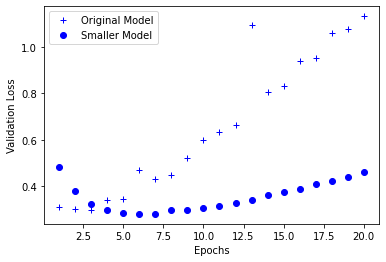

In [40]:
import matplotlib.pyplot as plt 

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original Model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

In [41]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [42]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 18s 350ms/step - loss: 0.4556 - accuracy: 0.8024 - val_loss: 0.2853 - val_accuracy: 0.8828
Epoch 2/20
49/49 [==============================] - 20s 418ms/step - loss: 0.2223 - accuracy: 0.9128 - val_loss: 0.2917 - val_accuracy: 0.8833
Epoch 3/20
49/49 [==============================] - 23s 474ms/step - loss: 0.1224 - accuracy: 0.9543 - val_loss: 0.3944 - val_accuracy: 0.8696
Epoch 4/20
49/49 [==============================] - 19s 385ms/step - loss: 0.0739 - accuracy: 0.9756 - val_loss: 0.3729 - val_accuracy: 0.8835
Epoch 5/20
49/49 [==============================] - 24s 491ms/step - loss: 0.0584 - accuracy: 0.9875 - val_loss: 0.3787 - val_accuracy: 0.8805
Epoch 6/20
49/49 [==============================] - 22s 463ms/step - loss: 0.0039 - accuracy: 0.9997 - val_loss: 0.7058 - val_accuracy: 0.8764
Epoch 7/20
49/49 [==============================] - 21s 423ms/step - loss: 3.4411e-04 - accuracy: 1.0000 - val_loss: 1.2192 - val_accuracy: 0.

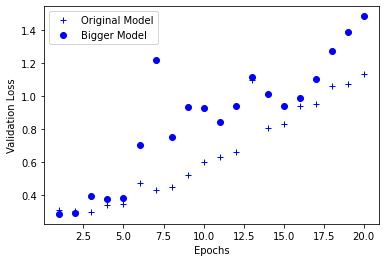

In [43]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original Model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

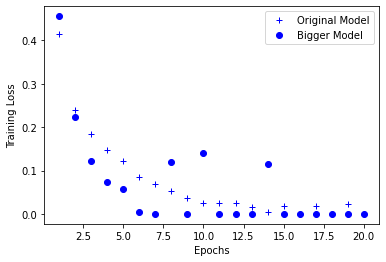

In [44]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original Model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger Model')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()

plt.show()

In [48]:
#Adding weight regularization

from keras import regularizers

l2_model =  models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [49]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [50]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 65ms/step - loss: 0.4840 - accuracy: 0.8256 - val_loss: 0.3717 - val_accuracy: 0.8823
Epoch 2/20
49/49 [==============================] - 2s 42ms/step - loss: 0.3085 - accuracy: 0.9050 - val_loss: 0.3375 - val_accuracy: 0.8838
Epoch 3/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2642 - accuracy: 0.9201 - val_loss: 0.3458 - val_accuracy: 0.8799
Epoch 4/20
49/49 [==============================] - 2s 44ms/step - loss: 0.2449 - accuracy: 0.9288 - val_loss: 0.3843 - val_accuracy: 0.8668
Epoch 5/20
49/49 [==============================] - 2s 50ms/step - loss: 0.2385 - accuracy: 0.9321 - val_loss: 0.3903 - val_accuracy: 0.8668
Epoch 6/20
49/49 [==============================] - 2s 49ms/step - loss: 0.2274 - accuracy: 0.9374 - val_loss: 0.3804 - val_accuracy: 0.8700
Epoch 7/20
49/49 [==============================] - 2s 49ms/step - loss: 0.2218 - accuracy: 0.9406 - val_loss: 0.3606 - val_accuracy: 0.8793
Epoch 8/20
49

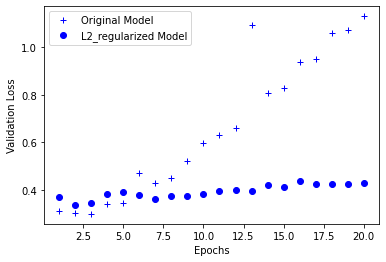

In [51]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original Model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2_regularized Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

In [52]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

In [56]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [57]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 7s 127ms/step - loss: 0.6015 - accuracy: 0.6754 - val_loss: 0.4787 - val_accuracy: 0.8562
Epoch 2/20
49/49 [==============================] - 2s 45ms/step - loss: 0.4550 - accuracy: 0.8097 - val_loss: 0.3568 - val_accuracy: 0.8765
Epoch 3/20
49/49 [==============================] - 2s 45ms/step - loss: 0.3669 - accuracy: 0.8611 - val_loss: 0.3048 - val_accuracy: 0.8872
Epoch 4/20
49/49 [==============================] - 2s 45ms/step - loss: 0.3130 - accuracy: 0.8919 - val_loss: 0.2815 - val_accuracy: 0.8884
Epoch 5/20
49/49 [==============================] - 2s 44ms/step - loss: 0.2795 - accuracy: 0.9068 - val_loss: 0.2816 - val_accuracy: 0.8893
Epoch 6/20
49/49 [==============================] - 2s 46ms/step - loss: 0.2492 - accuracy: 0.9167 - val_loss: 0.3064 - val_accuracy: 0.8843
Epoch 7/20
49/49 [==============================] - 2s 44ms/step - loss: 0.2238 - accuracy: 0.9280 - val_loss: 0.3012 - val_accuracy: 0.8870
Epoch 8/20
4

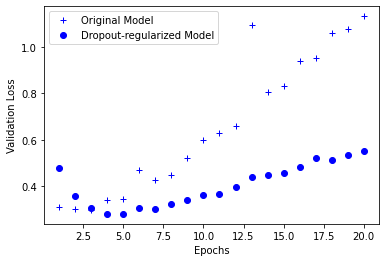

In [58]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original Model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()